In [3]:
import urllib
import io
import zipfile 

import matplotlib.pyplot as plt
import networkx as nx

import numpy as np

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()


RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

ImportError: numpy.core.multiarray failed to import

In [54]:
zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



In [55]:
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")


BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDiegoState        11
Baylor               10
NorthTexas           10
NorthernIllinois     10
Northwestern         11
WesternMichigan      10
Wisconsin            12
Wyoming              11
Auburn               11
Akron                11
VirginiaTech         11
Alabama              11
UCLA                 11
Arizona              11
Utah                 11
ArkansasState        10
NorthCarolinaState   11
BallState            10
Florida              11
BoiseState            9
BostonCollege        11
WestVirginia         11
BowlingGreenState    11
Michigan             11
Virginia             10
Buffalo              11
Syracuse             11
CentralFlorida        8
GeorgiaTech          11
CentralMichigan      11
Purdue               11
Colorado             11
ColoradoState   

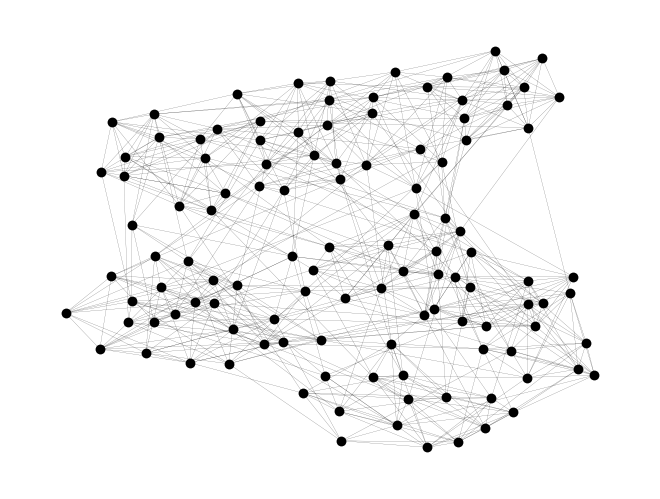

In [56]:
options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

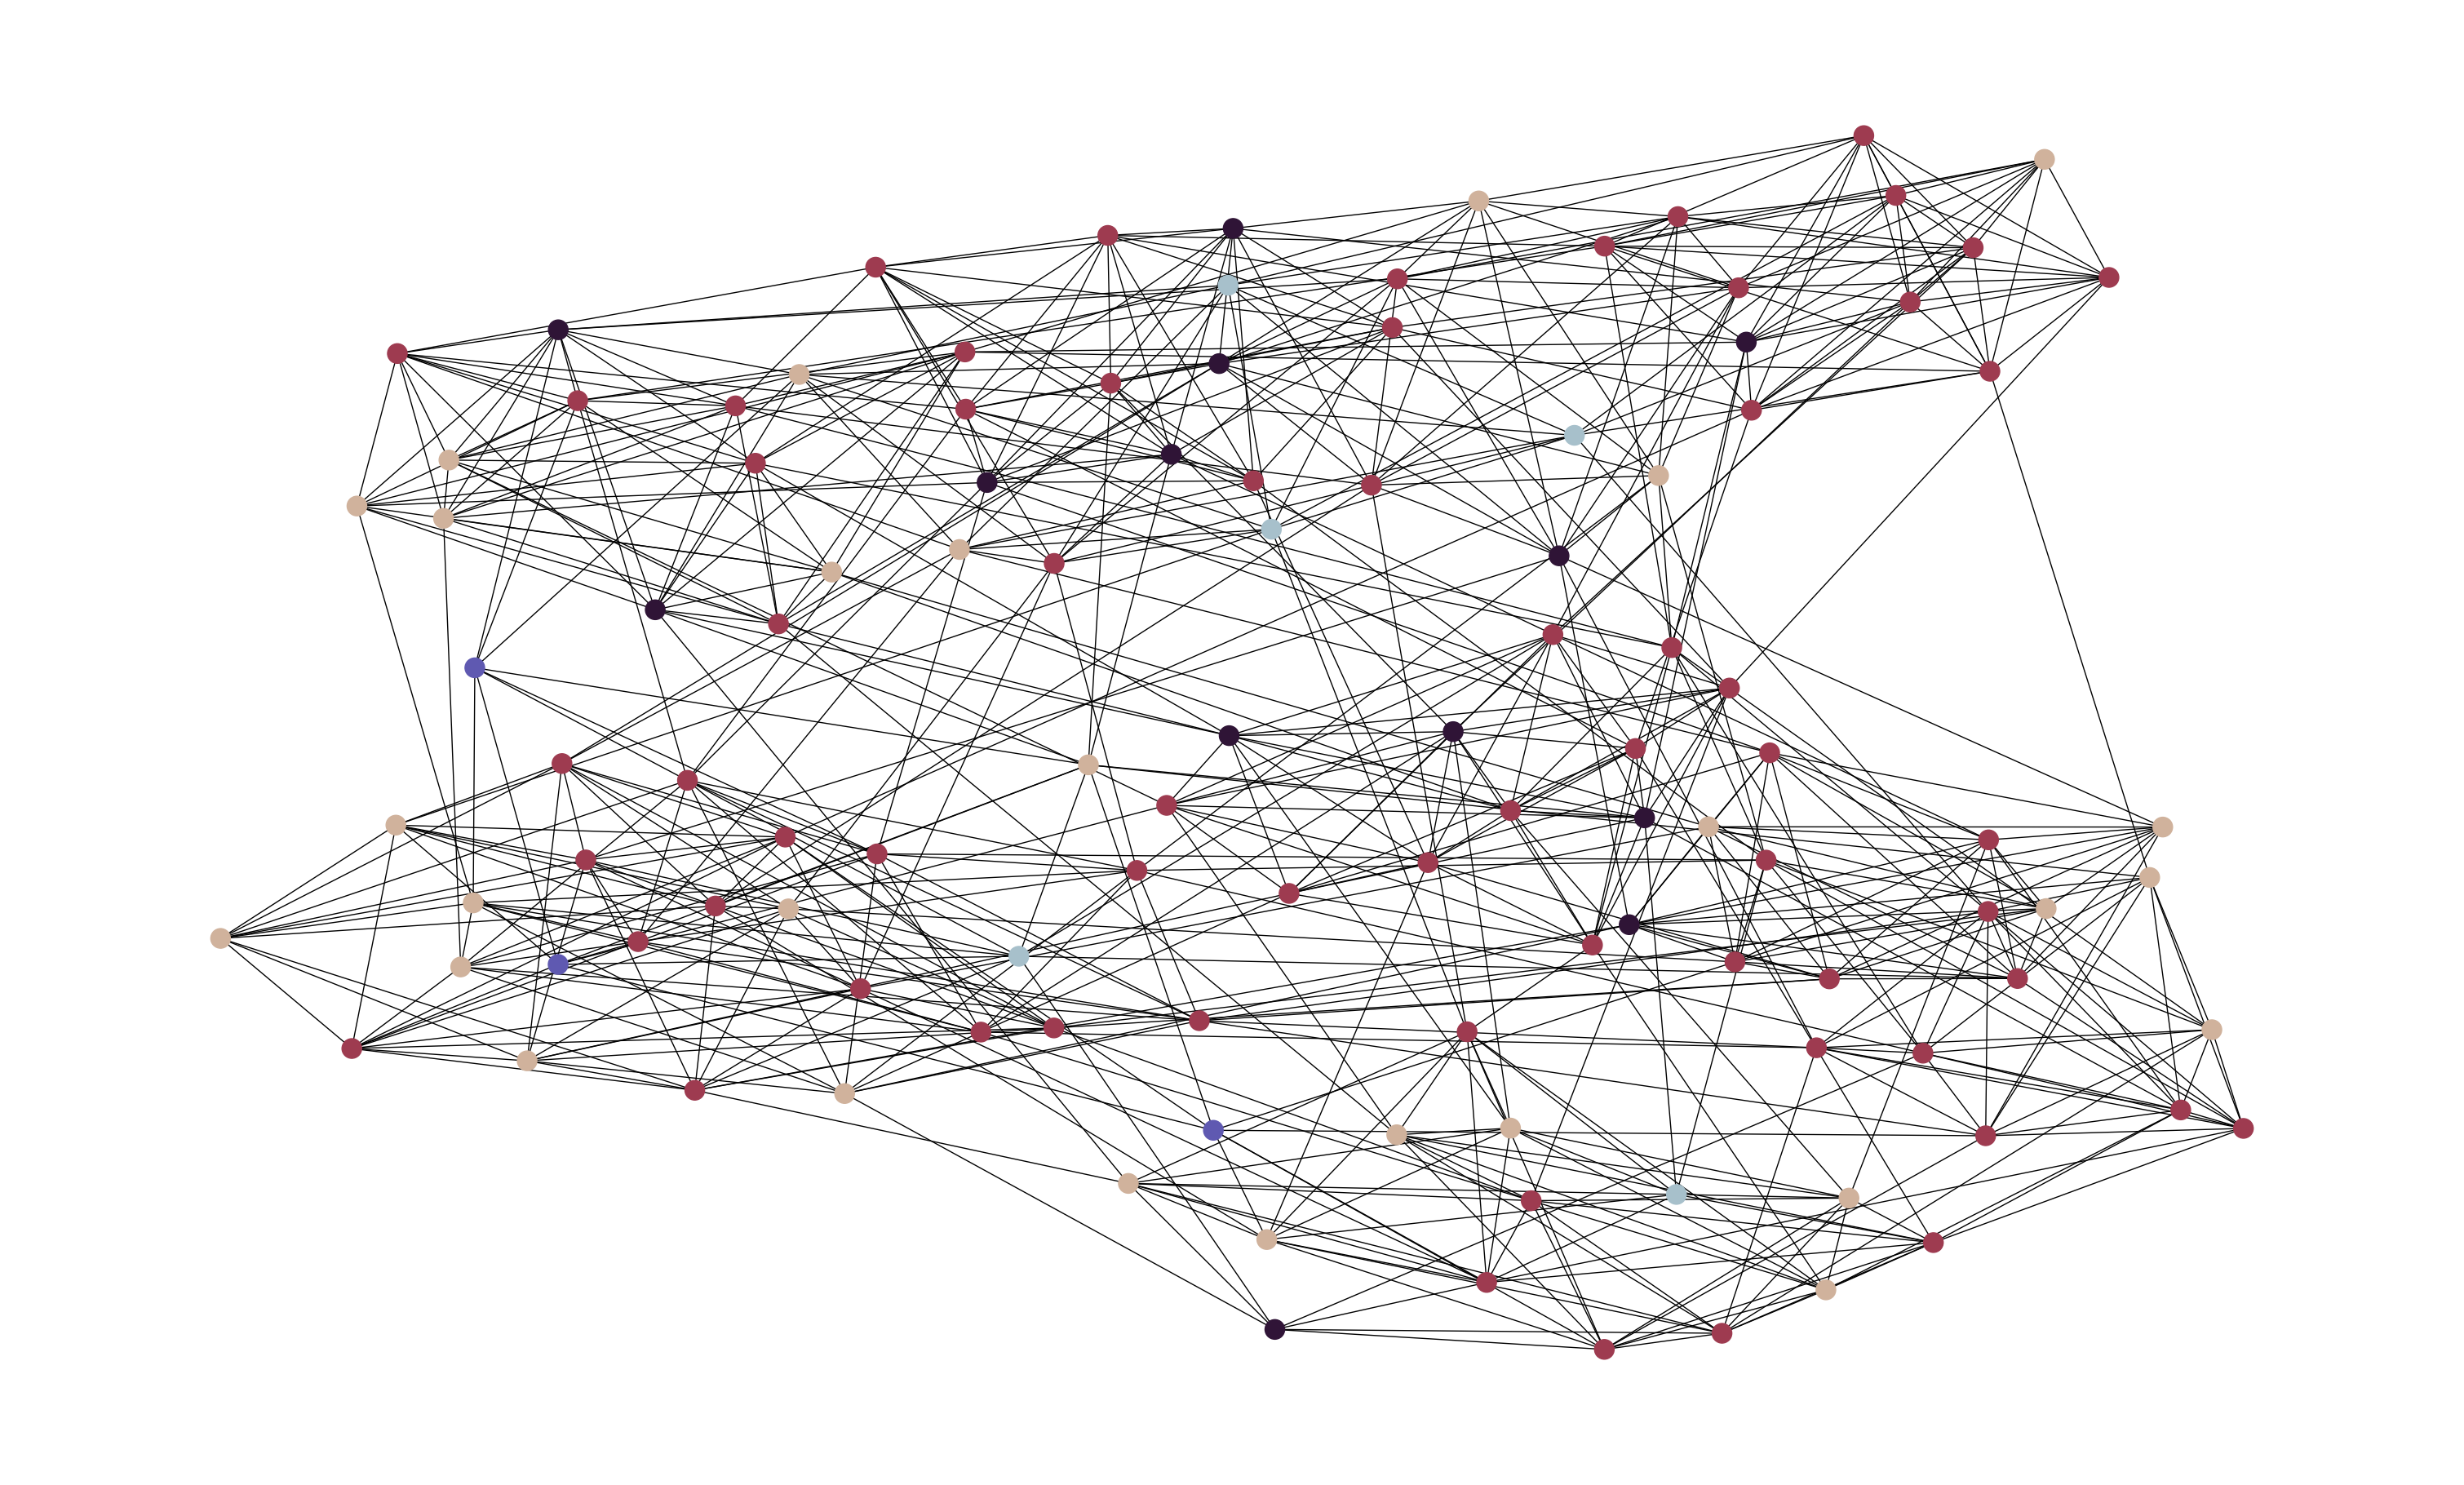

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt


d = dict(G.degree)
low, high = sorted(d.values())[0], sorted(d.values())[-1]
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.twilight_shifted)

options = {"node_size": 50, 
           "linewidths": 0, 
           "width": 0.1}
plt.figure(figsize =(30, 18))
nx.draw(G, pos,
        nodelist=d,
        node_color=[mapper.to_rgba(i) 
                    for i in d.values()])

plt.show()



In [58]:
def GetGraphMetrics(graph):
    
    graph_degree = dict(graph.degree)
    print("Graph Summary:")
    print(f"Number of nodes : {len(graph.nodes)}")
    print(f"Number of edges : {len(graph.edges)}")
    print(f"Maximum degree : {np.max(list(graph_degree.values()))}")
    print(f"Minimum degree : {np.min(list(graph_degree.values()))}")
    print(f"Average degree : {np.mean(list(graph_degree.values()))}")
    print(f"Median degree : {np.median(list(graph_degree.values()))}")
    print("")
    print("Graph Connectivity")
    try:
        print(f"Connected Components : {nx.number_connected_components(graph)}")
    except:
        print(f"Strongly Connected Components : {nx.number_strongly_connected_components(graph)}")
        print(f"Weakly Connected Components : {nx.number_weakly_connected_components(graph)}")
    print("")
    print("Graph Distance")
    print(f"Average Distance : {nx.average_shortest_path_length(graph)}")
    print(f"Diameter : {nx.algorithms.distance_measures.diameter(graph)}")
    print("")
    print("Graph Clustering")
    print(f"Transitivity : {nx.transitivity(graph)}")
    print(f"Average Clustering Coefficient : {nx.average_clustering(graph)}")
    
    
    return None



In [59]:
GetGraphMetrics(G)


Graph Summary:
Number of nodes : 115
Number of edges : 613
Maximum degree : 12
Minimum degree : 7
Average degree : 10.660869565217391
Median degree : 11.0

Graph Connectivity
Connected Components : 1

Graph Distance
Average Distance : 2.5081617086193746
Diameter : 4

Graph Clustering
Transitivity : 0.4072398190045249
Average Clustering Coefficient : 0.40321601104209814


C:\Users\nyadav\AppData\Local\Temp\ipykernel_44040\2910545329.py:9: RuntimeWarning: divide by zero encountered in log
  ax2 = sns.histplot(np.log(degree_freq), stat='frequency', kde=True, ax=ax2)


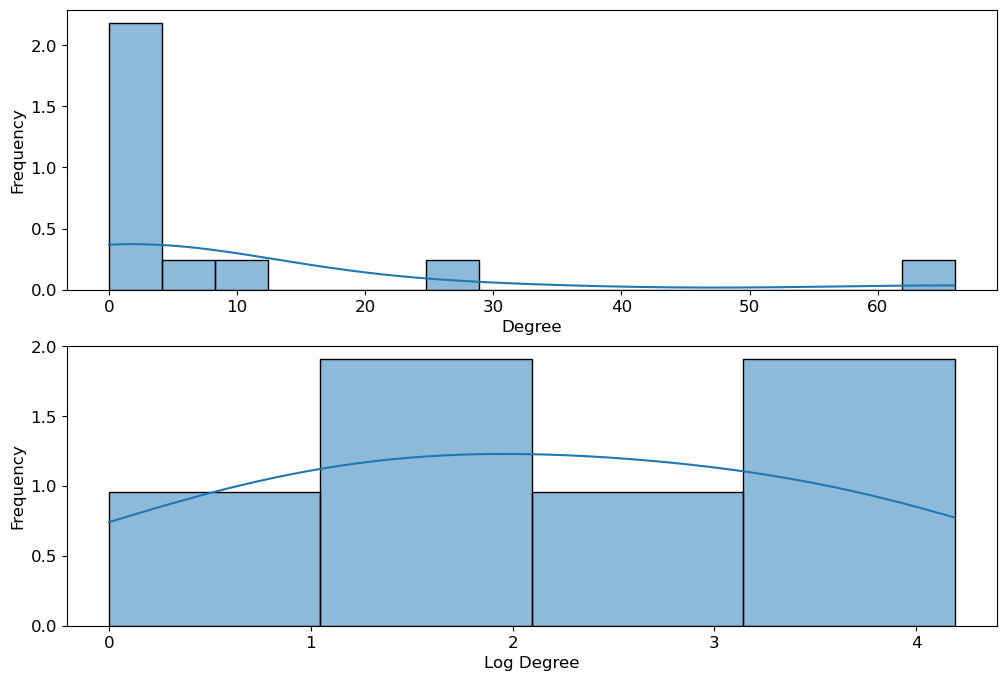

In [66]:
import seaborn as sns

degree_freq = np.array(nx.degree_histogram(G)).astype('float')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

ax1 = sns.histplot(degree_freq, stat='frequency', kde=True, ax=ax1)
ax2 = sns.histplot(np.log(degree_freq), stat='frequency', kde=True, ax=ax2)
ax1.set(ylabel="Frequency", xlabel="Degree")
ax2.set(ylabel="Frequency", xlabel="Log Degree")
plt.show()



In [116]:
import pandas as pd

def createDF(df_main, centrality_measure, centrality_name):
    df = pd.DataFrame(centrality_measure.items(), columns = ['Teams', centrality_name])
    df = pd.merge(df_main, df, on='Teams')
    return df


df = pd.DataFrame(list(G.nodes()), columns = ['Teams'])

df = createDF(df, nx.betweenness_centrality(G), 'Betweenness Centrality')
df = createDF(df,nx.degree_centrality(G), 'Degree Centrality')
df = createDF(df,nx.closeness_centrality(G), 'Closeness Centrality')
df = createDF(df, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
df = createDF(df, nx.pagerank(G), 'PageRank')
hub, auth = nx.hits(G)
df = createDF(df, hub, 'Hubs')
df = createDF(df, auth, 'Authorities')

df=df.set_index('Teams')
df

,Betweenness Centrality,Degree Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Hubs,Authorities
Teams,,,,,,,
BrighamYoung,0.032490,0.105263,0.423792,0.106503,0.009588,0.010092,0.010092
FloridaState,0.017621,0.105263,0.413043,0.096385,0.009641,0.009132,0.009132
Iowa,0.013122,0.105263,0.407143,0.116262,0.009509,0.011017,0.011017
KansasState,0.023070,0.105263,0.420664,0.106250,0.009617,0.010069,0.010069
NewMexico,0.010664,0.096491,0.402827,0.101190,0.008887,0.009589,0.009589
...,...,...,...,...,...,...,...
TexasChristian,0.014370,0.096491,0.413043,0.114943,0.008777,0.010893,0.010893
California,0.007516,0.096491,0.382550,0.111198,0.008809,0.010538,0.010538
AlabamaBirmingham,0.011582,0.087719,0.395833,0.073015,0.008369,0.006918,0.006918


In [117]:
for n in G.nodes():
    G.nodes[n]['name'] = n
    G.nodes[n]['degree'] = d[n]
    G.nodes[n]['degree_centrality'] = df[df.index==n]['Degree Centrality'].values[0]
    G.nodes[n]['closeness_centrality'] = df[df.index==n]['Closeness Centrality'].values[0]
    G.nodes[n]['betweenness_centrality'] = df[df.index==n]['Betweenness Centrality'].values[0]
    G.nodes[n]['eigenvector_centrality'] = df[df.index==n]['Eigenvector Centrality'].values[0]
    G.nodes[n]['pagerank'] = df[df.index==n]['PageRank'].values[0]
    G.nodes[n]['hubs'] = df[df.index==n]['Hubs'].values[0]
    G.nodes[n]['authorities'] = df[df.index==n]['Authorities'].values[0]


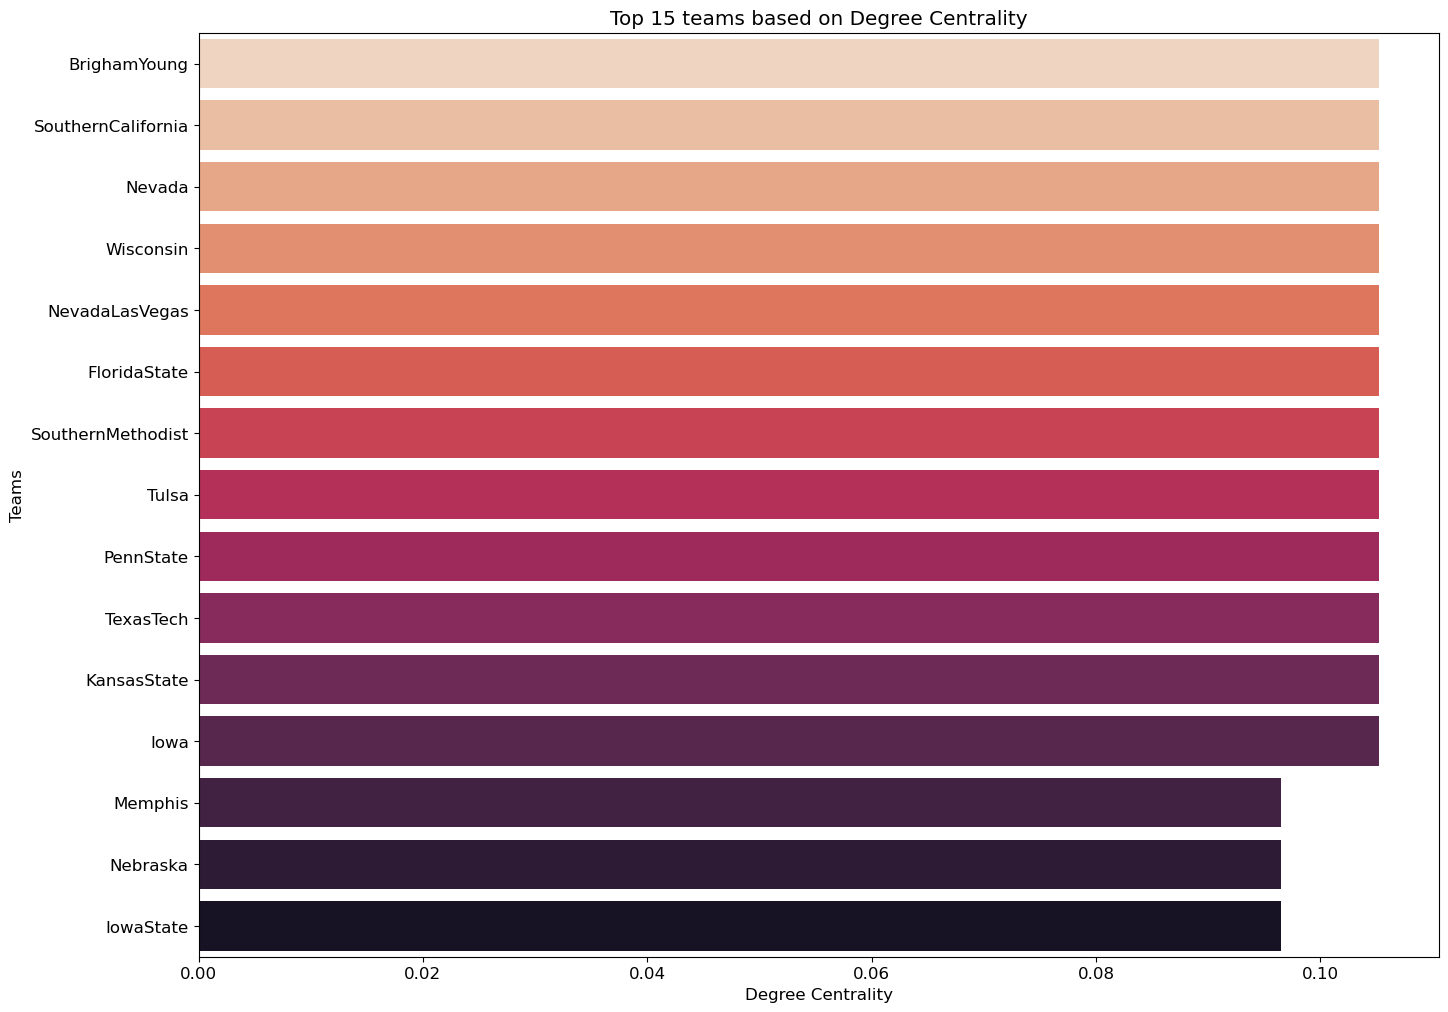

In [123]:
#pip install nx_altair
import nx_altair as nxa
import altair as alt

pos = nx.kamada_kawai_layout(G)

e = nxa.draw_networkx_edges(G, pos=pos)  # get the edge layer
n = nxa.draw_networkx_nodes(G, pos=pos)  # get the node layer

fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.barplot(x='Degree Centrality', y='Teams', data=df.sort_values(by='Degree Centrality', ascending=False)['Degree Centrality'].reset_index().rename(columns={'index': 'Teams'})[:15], palette='rocket_r')
ax.set(title="Top 15 teams based on Degree Centrality")
plt.show()


In [128]:
n = n.mark_circle().encode(
        color=alt.Color('degree_centrality:Q', scale=alt.Scale(scheme='inferno')), 
        size=alt.Size('degree_centrality:Q',
                     scale=alt.Scale(range=[10,500])),
        tooltip=[alt.Tooltip('name'), alt.Tooltip('degree')]
        ).interactive()
e = e.mark_line().encode()

(e+n).properties(width=1200,height=800, title='Football Network by Degree Centrality')


alt.LayerChart(...)